In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [1082]:
plt.style.use('ggplot')
pd.set_option('max_columns', None)

In [750]:
file = '/Users/tim/Documents/GitHub/pandas_additional/data/hotel_bookings.csv'
df_original = pd.read_csv(file)
df = df_original.copy()

## Features

| Feature | Description | Notes
| --- | --- | --- |
|hotel| Type of hotel |Resort Hotel|
| | | City Hotel |
|meal|Type of meal booked |Undefined/SC – no meal package |
| | | BB – Bed & Breakfast|
| | | HB – Half board (breakfast and one other meal – usually dinner)|
| | | FB – Full board (breakfast, lunch and dinner) |
|market_segment| Where the booking came from|The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel|Booking distribution channel | The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|reserved_room_type|Code of room type reserved | |
|assigned_room_type|Code for the type of room assigned to the booking| Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons or customer request |
|deposit_type| What kind of deposit was taken| |
|customer_type| Type of booking| Contract - when the booking has a contract associated to it
| | | Group – when the booking is associated to a group |
| | | Transient – when the booking is not part of a group or contract, and is not associated to another transient booking| 
| | | Transient-party – when the booking is transient, but is associated with at least one other transient booking |
|lead_time| How long in advance the booking was made (days)|
|stays_in_weekend_nights|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights|Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel  |
|adults| Number of adult guests on the booking|
|children| Number of children |
|babies| Number of babies|
|is_repeated_guest| Whether the booking came from a repeat customer| 0 - no |
| | | 1 - yes |
|previous_cancellations| Number of previous cancellations by the customer|
|previous_bookings_not_canceled| Number of previous bookings by the customer not cancelled|
|booking_changes| Number of changes made by the customer after initial booking|
|days_in_waiting_list| Number of days the booking was in the waiting list before it was confirmed to the customer|
|required_car_parking_spaces|Number of car parking spaces required by the customer |
|total_of_special_requests| Number of special requests made by the customer|
|adr|Average daily rate|
|is_canceled| Whether the booking was cancelled | 0 - not cancelled |
| | | 1 - cancelled |

### Basic Information

In [751]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [752]:
df.shape

(119390, 32)

In [753]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Duplicated Value Analysis

    Barring additional information, I would hesitate to label the following as duplicated information. This is because it is certainly possible for rows of the same kind of people who book a book in the resort on the same date. We will need a unique-booking-id column to truly conclude that these are indeed duplicated entries

In [754]:
df.duplicated().sum()

31994

In [755]:
df[df.duplicated(keep=False)].sort_values(by=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
843,Resort Hotel,1,84,2015,August,31,1,2,1,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,175.0,NaN,0,Transient-Party,118.06,0,0,Canceled,2015-05-12
844,Resort Hotel,1,84,2015,August,31,1,2,1,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,175.0,NaN,0,Transient-Party,118.06,0,0,Canceled,2015-05-12
846,Resort Hotel,1,10,2015,August,31,1,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient-Party,202.00,0,0,Canceled,2015-07-29
848,Resort Hotel,1,10,2015,August,31,1,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient-Party,202.00,0,0,Canceled,2015-07-29
15943,Resort Hotel,0,67,2015,August,31,1,2,6,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,2,No Deposit,240.0,NaN,0,Transient,193.13,0,1,Check-Out,2015-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113135,City Hotel,0,409,2017,May,22,31,0,3,2,0.0,0,BB,AUS,Groups,TA/TO,0,0,0,A,A,0,No Deposit,229.0,NaN,0,Transient-Party,112.67,0,1,Check-Out,2017-06-03
113157,City Hotel,0,77,2017,May,22,31,0,3,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,159.00,0,2,Check-Out,2017-06-03
113160,City Hotel,0,77,2017,May,22,31,0,3,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,159.00,0,2,Check-Out,2017-06-03
113205,City Hotel,0,154,2017,May,22,31,0,4,2,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,135.00,0,1,Check-Out,2017-06-04


### Missing Value Analysis

In [756]:
df.isna().sum()[df.isna().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

### Univariate Analysis

In [757]:
# df['hotel'].value_counts()
# df['hotel'].value_counts() / df.shape[0]
# df['hotel'] = df['hotel'].astype('category')

In [758]:
# df['is_canceled'].value_counts()
# df['is_canceled'].value_counts() / df.shape[0]
df['is_canceled'] = df['is_canceled'].astype('bool')

In [759]:
# df['lead_time'].value_counts()
# df['lead_time'].value_counts() / df.shape[0]

In [760]:
def convert_month(x):
    month_list = ['January', 'February', 'March', 
        'April', 'May', 'June', 'July', 'August', 
        'September', 'October', 'November', 
        'December']
    return month_list.index(x) + 1

df['arrival_date_month'] = df['arrival_date_month'].apply(convert_month)

df.rename(columns={'arrival_date_year':'year',
                   'arrival_date_month': 'month',
                   'arrival_date_day_of_month': 'day'}, inplace=True)

df['arrival_date'] = pd.to_datetime(df[['year', 'month', 'day']])

df.rename(columns={'year': 'arrival_date_year',
                   'month': 'arrival_date_month',
                   'day': 'arrival_date_day_of_month'}, inplace=True)

In [761]:
# df['stays_in_weekend_nights'].value_counts()
# df['stays_in_weekend_nights'].value_counts() / df.shape[0]

In [762]:
# df['stays_in_week_nights'].value_counts()
# df['stays_in_week_nights'].value_counts() / df.shape[0]

In [763]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# df['total_nights'].value_counts()
# df['total_nights'].value_counts() / df.shape[0]

In [764]:
# df['adults'].value_counts()
# df['adults'].value_counts() / df.shape[0]

In [765]:
# df['children'].value_counts()
# df['children'].value_counts() / df.shape[0]
# df[(np.abs(stats.zscore(df[['children']])) > 3).values]
df['children'] = df['children'].fillna(0.0)
df['children'] = df['children'].astype('int64')

In [766]:
# df['babies'].value_counts()
# df['babies'].value_counts() / df.shape[0]
# df[(np.abs(stats.zscore(df[['babies']])) > 3).values] # 1 baby is already considered an outlier

<AxesSubplot:xlabel='children', ylabel='Count'>

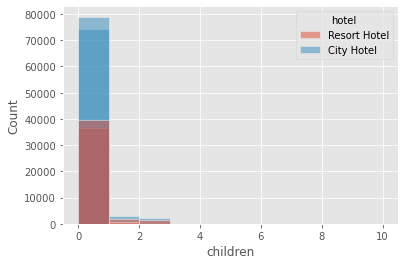

In [767]:
sns.histplot(data=df, x='children' , hue='hotel', bins=10)
sns.histplot(data=df, x='babies' , hue='hotel', bins=10)

In [768]:
# consider throwing out such outlier data. Doesnt make any sense that 2 adults are travelling with ~ 10 kids
# Also, remove data that is np.nan
df[(df['children'] > 5) | (df['babies'] > 5)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights
328,Resort Hotel,True,55,2015,7,29,12,4,10,2,10,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12,2015-07-12,14
46619,City Hotel,False,37,2016,1,3,12,0,2,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14,2016-01-12,2
78656,City Hotel,False,11,2015,10,42,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14,2015-10-11,3


In [769]:
# df['meal'].value_counts()
# df['meal'].value_counts() / df.shape[0]
df['meal'] = df['meal'].replace('Undefined', 'SC')
df['meal'] = df['meal'].astype('category')

In [770]:
# df['country'].isna().sum() # 488 null values
df['country'].isna().sum() / df.shape[0] # 0.4% of data. might consider dropping these rows?
# df[df['country'].isna() == True]
# df['country'].value_counts()
# df['country'].value_counts()[:10].plot(kind='barh', figsize=(8, 6)).invert_yaxis()

0.004087444509590418

In [771]:
# df['market_segment'].value_counts()
# df['market_segment'].value_counts() / df.shape[0]
df['market_segment'] = df['market_segment'].replace('Undefined', np.nan)

In [772]:
# df['distribution_channel'].value_counts()
# df['distribution_channel'].value_counts() / df.shape[0]
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', np.nan)
# pd.crosstab(index= df['is_canceled'], columns = df['distribution_channel'], normalize='index')

# Amongst those who cancelled, 16% are from direct booking

In [773]:
# df['is_repeated_guest'].value_counts()
# df['is_repeated_guest'].value_counts() / df.shape[0]
# pd.crosstab(index= df['is_canceled'], columns = df['is_repeated_guest'], normalize='index')

# Interpretation: Amongst those who cancel, 4.3% are repeated guests. Amongst those who did not cancel, 1.2% are repeated guests.

In [774]:
# df['previous_cancellations'].value_counts()
# df['previous_cancellations'].value_counts() / df.shape[0]
# (df['previous_cancellations'].value_counts() / df.shape[0]).plot(kind='barh').invert_yaxis()
# pd.crosstab(index= df['is_canceled'], columns = df['previous_cancellations'], normalize='index')

# Interpretation: Amongst those who did not cancel 99% had 0 previous cancellation records
#                 Amongst those who cancel 86% had 0 previous cancellation records, and 12% had 1 previous cancellation records

In [775]:
# Note these are the previous bookings NOT canceled by the customer

# df['previous_bookings_not_canceled'].value_counts()
# df['previous_bookings_not_canceled'].value_counts() / df.shape[0]
# pd.crosstab(index=df['is_canceled'], columns=df['previous_bookings_not_canceled'], normalize='index')

# Interpretation, amongst those who did not cancel their booking, 95% had not canceled a previous booking

In [776]:
# df['reserved_room_type'].value_counts()
# df['reserved_room_type'].value_counts() / df.shape[0]
# pd.crosstab(index=df['is_canceled'], columns=df['reserved_room_type'], normalize='index')

In [777]:
# df['assigned_room_type'].value_counts()
# df['assigned_room_type'].value_counts() / df.shape[0]
# pd.crosstab(index=df['is_canceled'], columns=df['assigned_room_type'], normalize='index')

In [778]:
# df['reserved_equal_assigned'].value_counts()
# pd.crosstab(index=df['is_canceled'], columns=df['reserved_equal_assigned'], normalize='index')
df['reserved_equal_assigned'] = (df['reserved_room_type'] == df['assigned_room_type'])


In [779]:
# df['booking_changes'].value_counts()
# df['booking_changes'].value_counts() / df.shape[0]

In [780]:
# df['deposit_type'].value_counts()
# df['deposit_type'].value_counts() / df.shape[0]

In [781]:
# df['agent'].isna().sum() # 16,340 null values in the column
# df['agent'].isna().sum() / df.shape[0] # 13.6 % of the dataset
# df['agent'].value_counts()
# df['agent'].plot(kind='hist').set(xlabel='agent', title='Histogram plot of agent'


# plot
# ax = df['agent'].value_counts().sort_values(ascending=False).iloc[:10].plot(kind='barh')
# ax.invert_yaxis()
# ax.set_xlabel('agent')
# ax.set_title('Histogram plot of agent')
# ax.bar_label(ax.containers[0])

# consider dropping agent since there is no information about this columns

In [782]:
# df['company'].isna().sum() # 112593 missing values
# df['company'].isna().sum() / df.shape[0] # 94.3% missing
# df['company'].value_counts()

In [783]:
# df['days_in_waiting_list'].value_counts()
# df['days_in_waiting_list'].value_counts() / df.shape[0] 
# 96% in 0 days. To be expected. is there a correlation to the need to be put in a waiting list by months?

# ax = df['days_in_waiting_list'].value_counts().iloc[:10].plot(kind='barh')
# ax.invert_yaxis()
# ax.set_ylabel('Day')
# ax.set_xlabel('Frequency')
# ax.set_title('Days in Waiting List')

In [784]:
# df['customer_type'].value_counts()
# df['customer_type'].value_counts() / df.shape[0]

In [785]:
# df['test'] = pd.cut(df['adr'], bins=50)
# print(
#     df['adr'].mean(),
#     df['adr'].mode().values.sum(),
#     df['adr'].median()
# )
# pd.crosstab(index=df['is_canceled'], columns=df['test'], normalize='index')

In [786]:
# df['required_car_parking_spaces'].value_counts()
# df['required_car_parking_spaces'].value_counts() / df.shape[0]

In [787]:
# df['total_of_special_requests'].value_counts()
# df['total_of_special_requests'].value_counts() / df.shape[0]

In [788]:
# df['reservation_status'].value_counts()
# df['reservation_status'].value_counts() / df.shape[0]

In [789]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

    missing values: children, country, agent, company

In [790]:
categorical_var = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment',
                   'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
                   'assigned_room_type', 'reserved_equal_assigned', 'deposit_type',
                   'customer_type', 'reservation_status']
discrete_var = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'total_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                'previous_bookings_not_canceled', 'booking_changes',
                'days_in_waiting_list', 'required_car_parking_spaces',
                'total_of_special_requests']
datetime = ['arrival_date']
continuous_var =['adr']
other_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                 'arrival_date_day_of_month', 'reservation_status_date']
dropped_columns = ['agent', 'company']

### Discrete and Continuous Univariate EDA

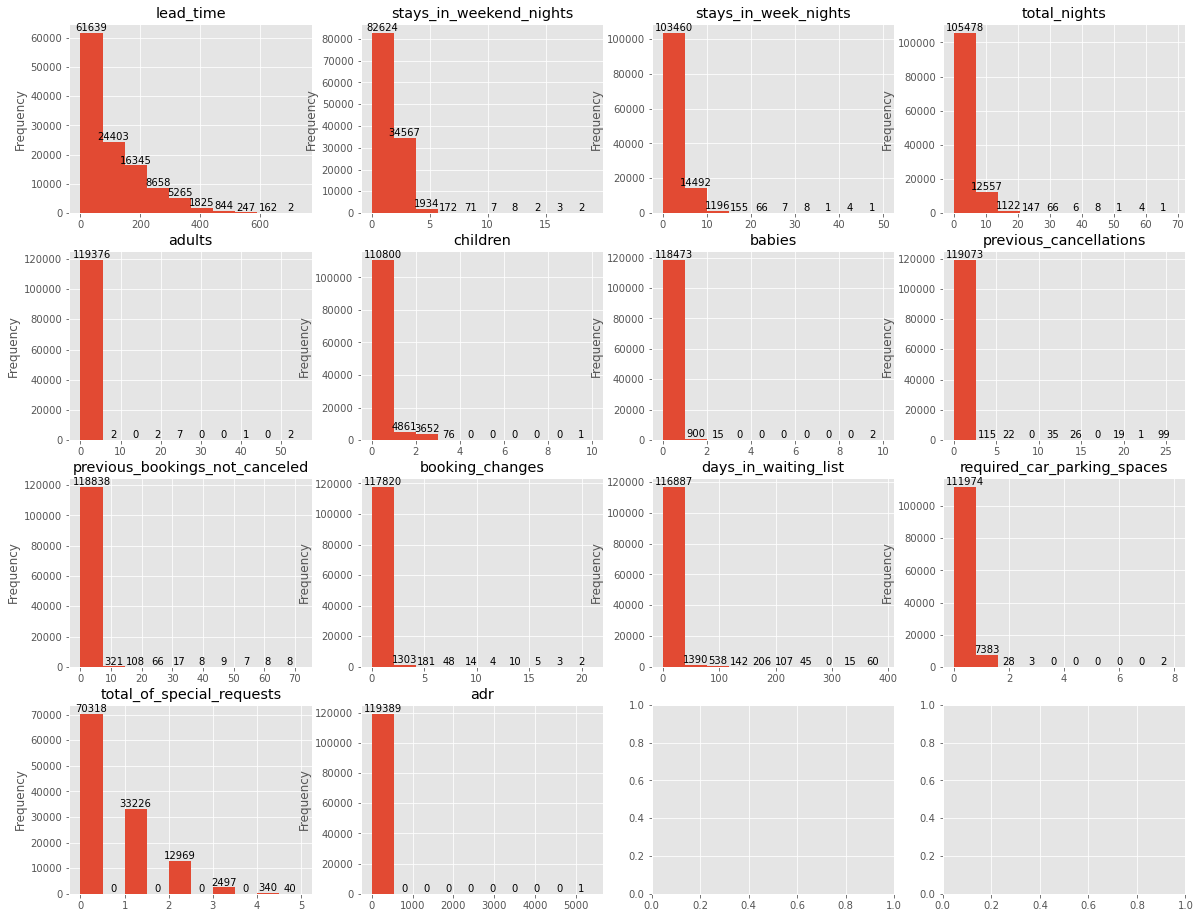

In [791]:
discrete_cont_var = discrete_var + continuous_var

fig, ax = plt.subplots(4,4)
fig.set_size_inches(20, 16)

for index, column in enumerate(discrete_cont_var):
    fig = df[column].plot(kind='hist', ax=ax.flatten()[index])
    fig.set_title(column)
    fig.bar_label(fig.containers[0])

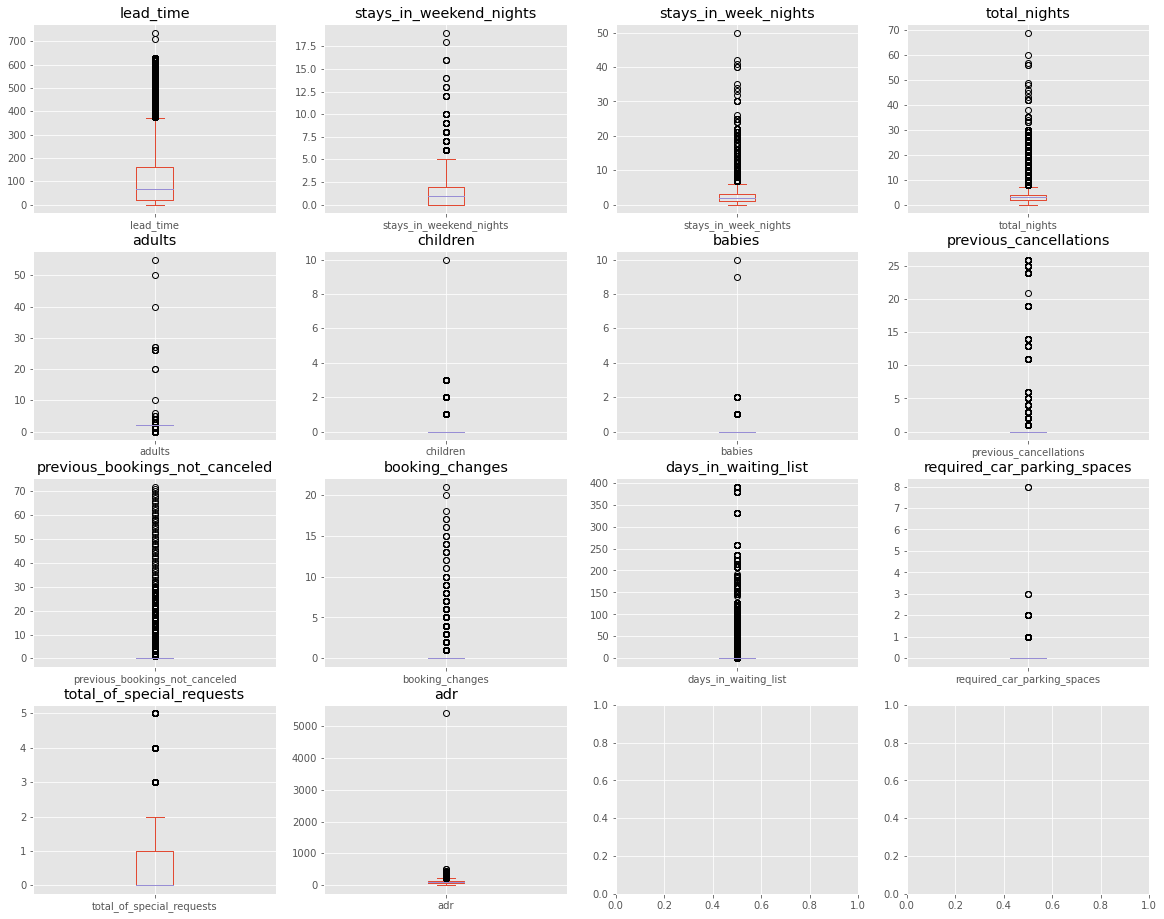

In [792]:
fig, ax = plt.subplots(4,4)
fig.set_size_inches(20, 16)

for index, column in enumerate(discrete_cont_var):
    fig = df[column].plot(kind='box', ax=ax.flatten()[index])
    fig.set_title(column)

### Categorical Variables Univariate EDA

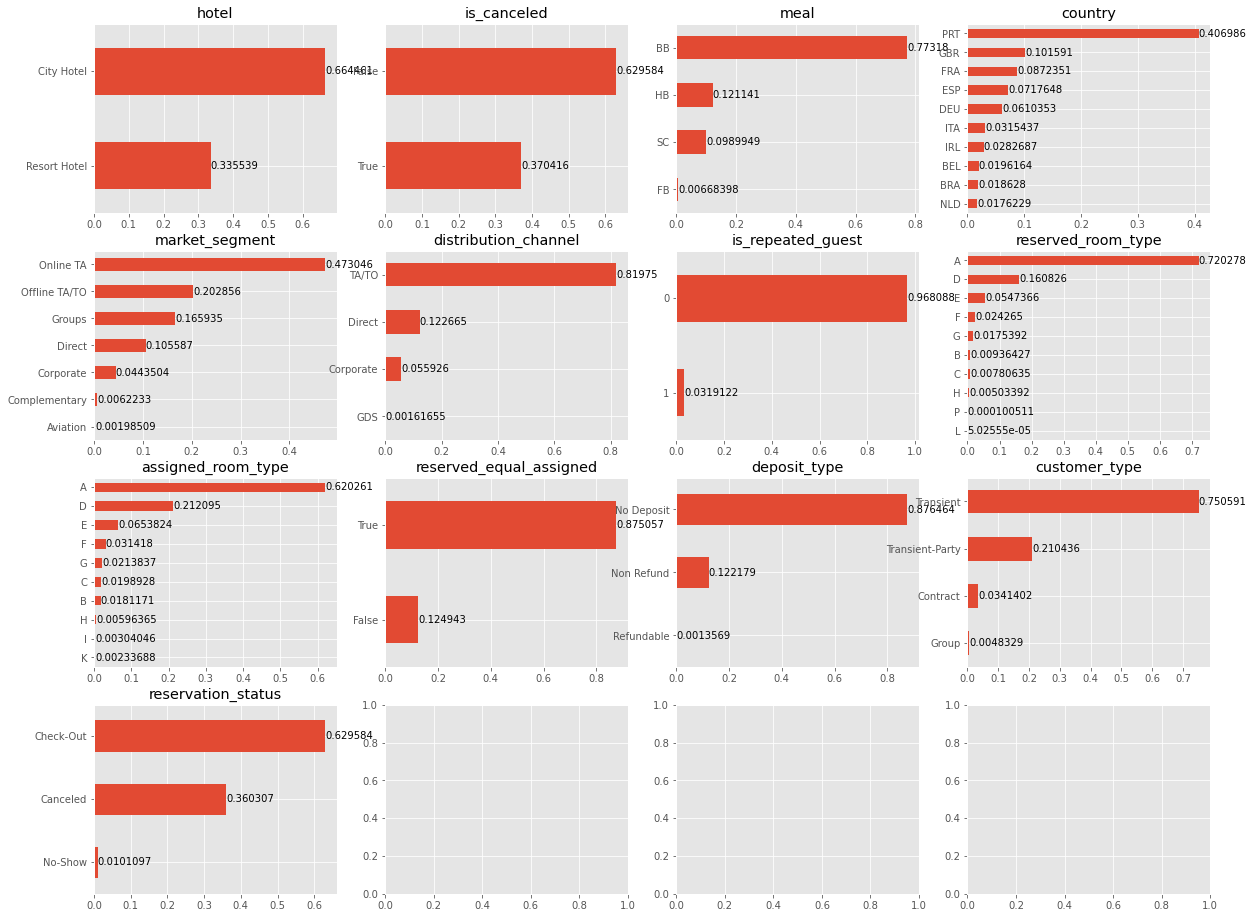

In [793]:
fig, ax = plt.subplots(4,4)
fig.set_size_inches(20, 16)

for index, column in enumerate(categorical_var):
    data = df[column].value_counts() / df.shape[0]
    data = data.iloc[:10]
    fig = data.plot(kind='barh', ax=ax.flatten()[index])
    fig.bar_label(fig.containers[0])
    fig.invert_yaxis()
    fig.set_title(column)

### Dropping missing values and subset the important ones for further analyses

    I have decided to drop both the agent and company columns. For missing values in children and country, I have decided to drop the rows.
    KIV dropping outliers

In [794]:
df_dropped = df.copy()
df_dropped = df_dropped.drop(['agent', 'company'], axis=1)
df_dropped = df_dropped.dropna()

# df_dropped.isna().sum()[df_dropped.isna().sum() > 0] # no more missing values within the dataset

In [795]:
all_var_for_analyses = datetime + categorical_var + discrete_var + continuous_var

df_dropped = df_dropped[all_var_for_analyses]
df_cleaned = df_dropped.copy()


In [796]:
df_cleaned

,arrival_date,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,reserved_equal_assigned,deposit_type,customer_type,reservation_status,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr
0,2015-07-01,Resort Hotel,False,BB,PRT,Direct,Direct,0,C,C,True,No Deposit,Transient,Check-Out,342,0,0,0,2,0,0,0,0,3,0,0,0,0.00
1,2015-07-01,Resort Hotel,False,BB,PRT,Direct,Direct,0,C,C,True,No Deposit,Transient,Check-Out,737,0,0,0,2,0,0,0,0,4,0,0,0,0.00
2,2015-07-01,Resort Hotel,False,BB,GBR,Direct,Direct,0,A,C,False,No Deposit,Transient,Check-Out,7,0,1,1,1,0,0,0,0,0,0,0,0,75.00
3,2015-07-01,Resort Hotel,False,BB,GBR,Corporate,Corporate,0,A,A,True,No Deposit,Transient,Check-Out,13,0,1,1,1,0,0,0,0,0,0,0,0,75.00
4,2015-07-01,Resort Hotel,False,BB,GBR,Online TA,TA/TO,0,A,A,True,No Deposit,Transient,Check-Out,14,0,2,2,2,0,0,0,0,0,0,0,1,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,2017-08-30,City Hotel,False,BB,BEL,Offline TA/TO,TA/TO,0,A,A,True,No Deposit,Transient,Check-Out,23,2,5,7,2,0,0,0,0,0,0,0,0,96.14
119386,2017-08-31,City Hotel,False,BB,FRA,Online TA,TA/TO,0,E,E,True,No Deposit,Transient,Check-Out,102,2,5,7,3,0,0,0,0,0,0,0,2,225.43
119387,2017-08-31,City Hotel,False,BB,DEU,Online TA,TA/TO,0,D,D,True,No Deposit,Transient,Check-Out,34,2,5,7,2,0,0,0,0,0,0,0,4,157.71
119388,2017-08-31,City Hotel,False,BB,GBR,Online TA,TA/TO,0,A,A,True,No Deposit,Transient,Check-Out,109,2,5,7,2,0,0,0,0,0,0,0,0,104.40


Text(0.03, 0.98, 'Correlation between Variables')

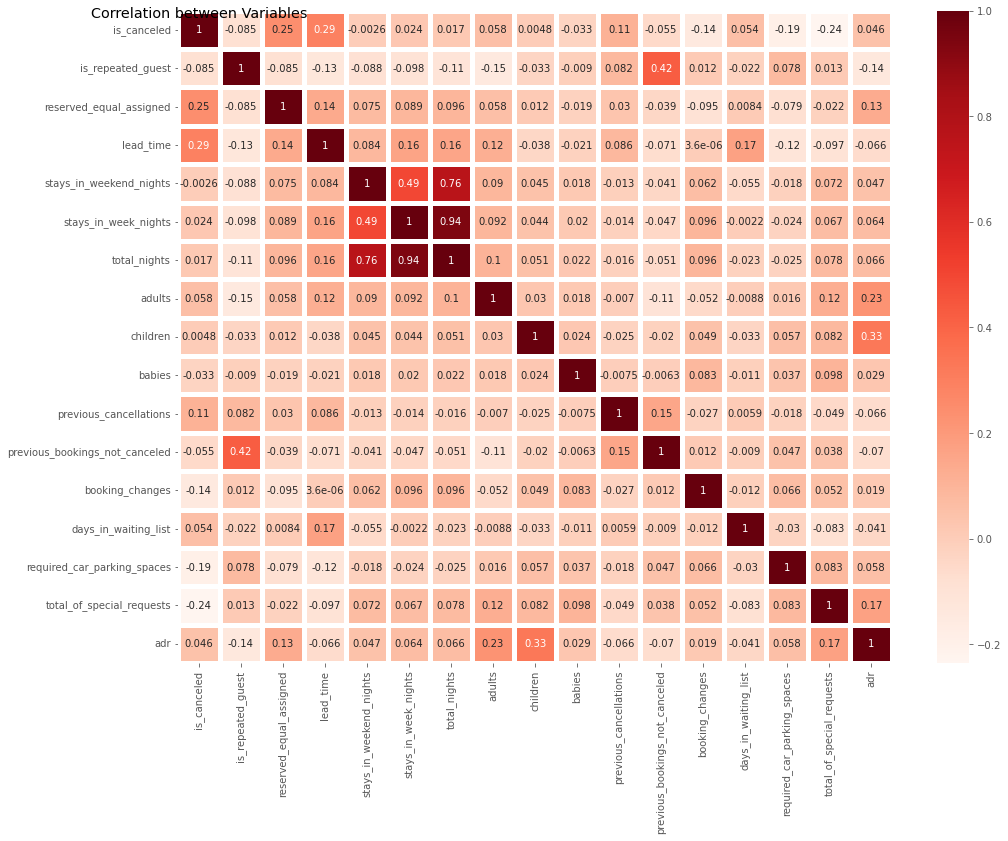

In [797]:
plt.figure(figsize=(16,12))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Reds', linewidths=5)
plt.title('Correlation between Variables', x=0.03, y=0.98)

    lead_time might be roughly : canceled
    reserved_equal_assigned : canceled
    previous_cancellation : canceled
    booking_changes: canceled
    special_requests: canceled
    car_parking_spaces: canceled

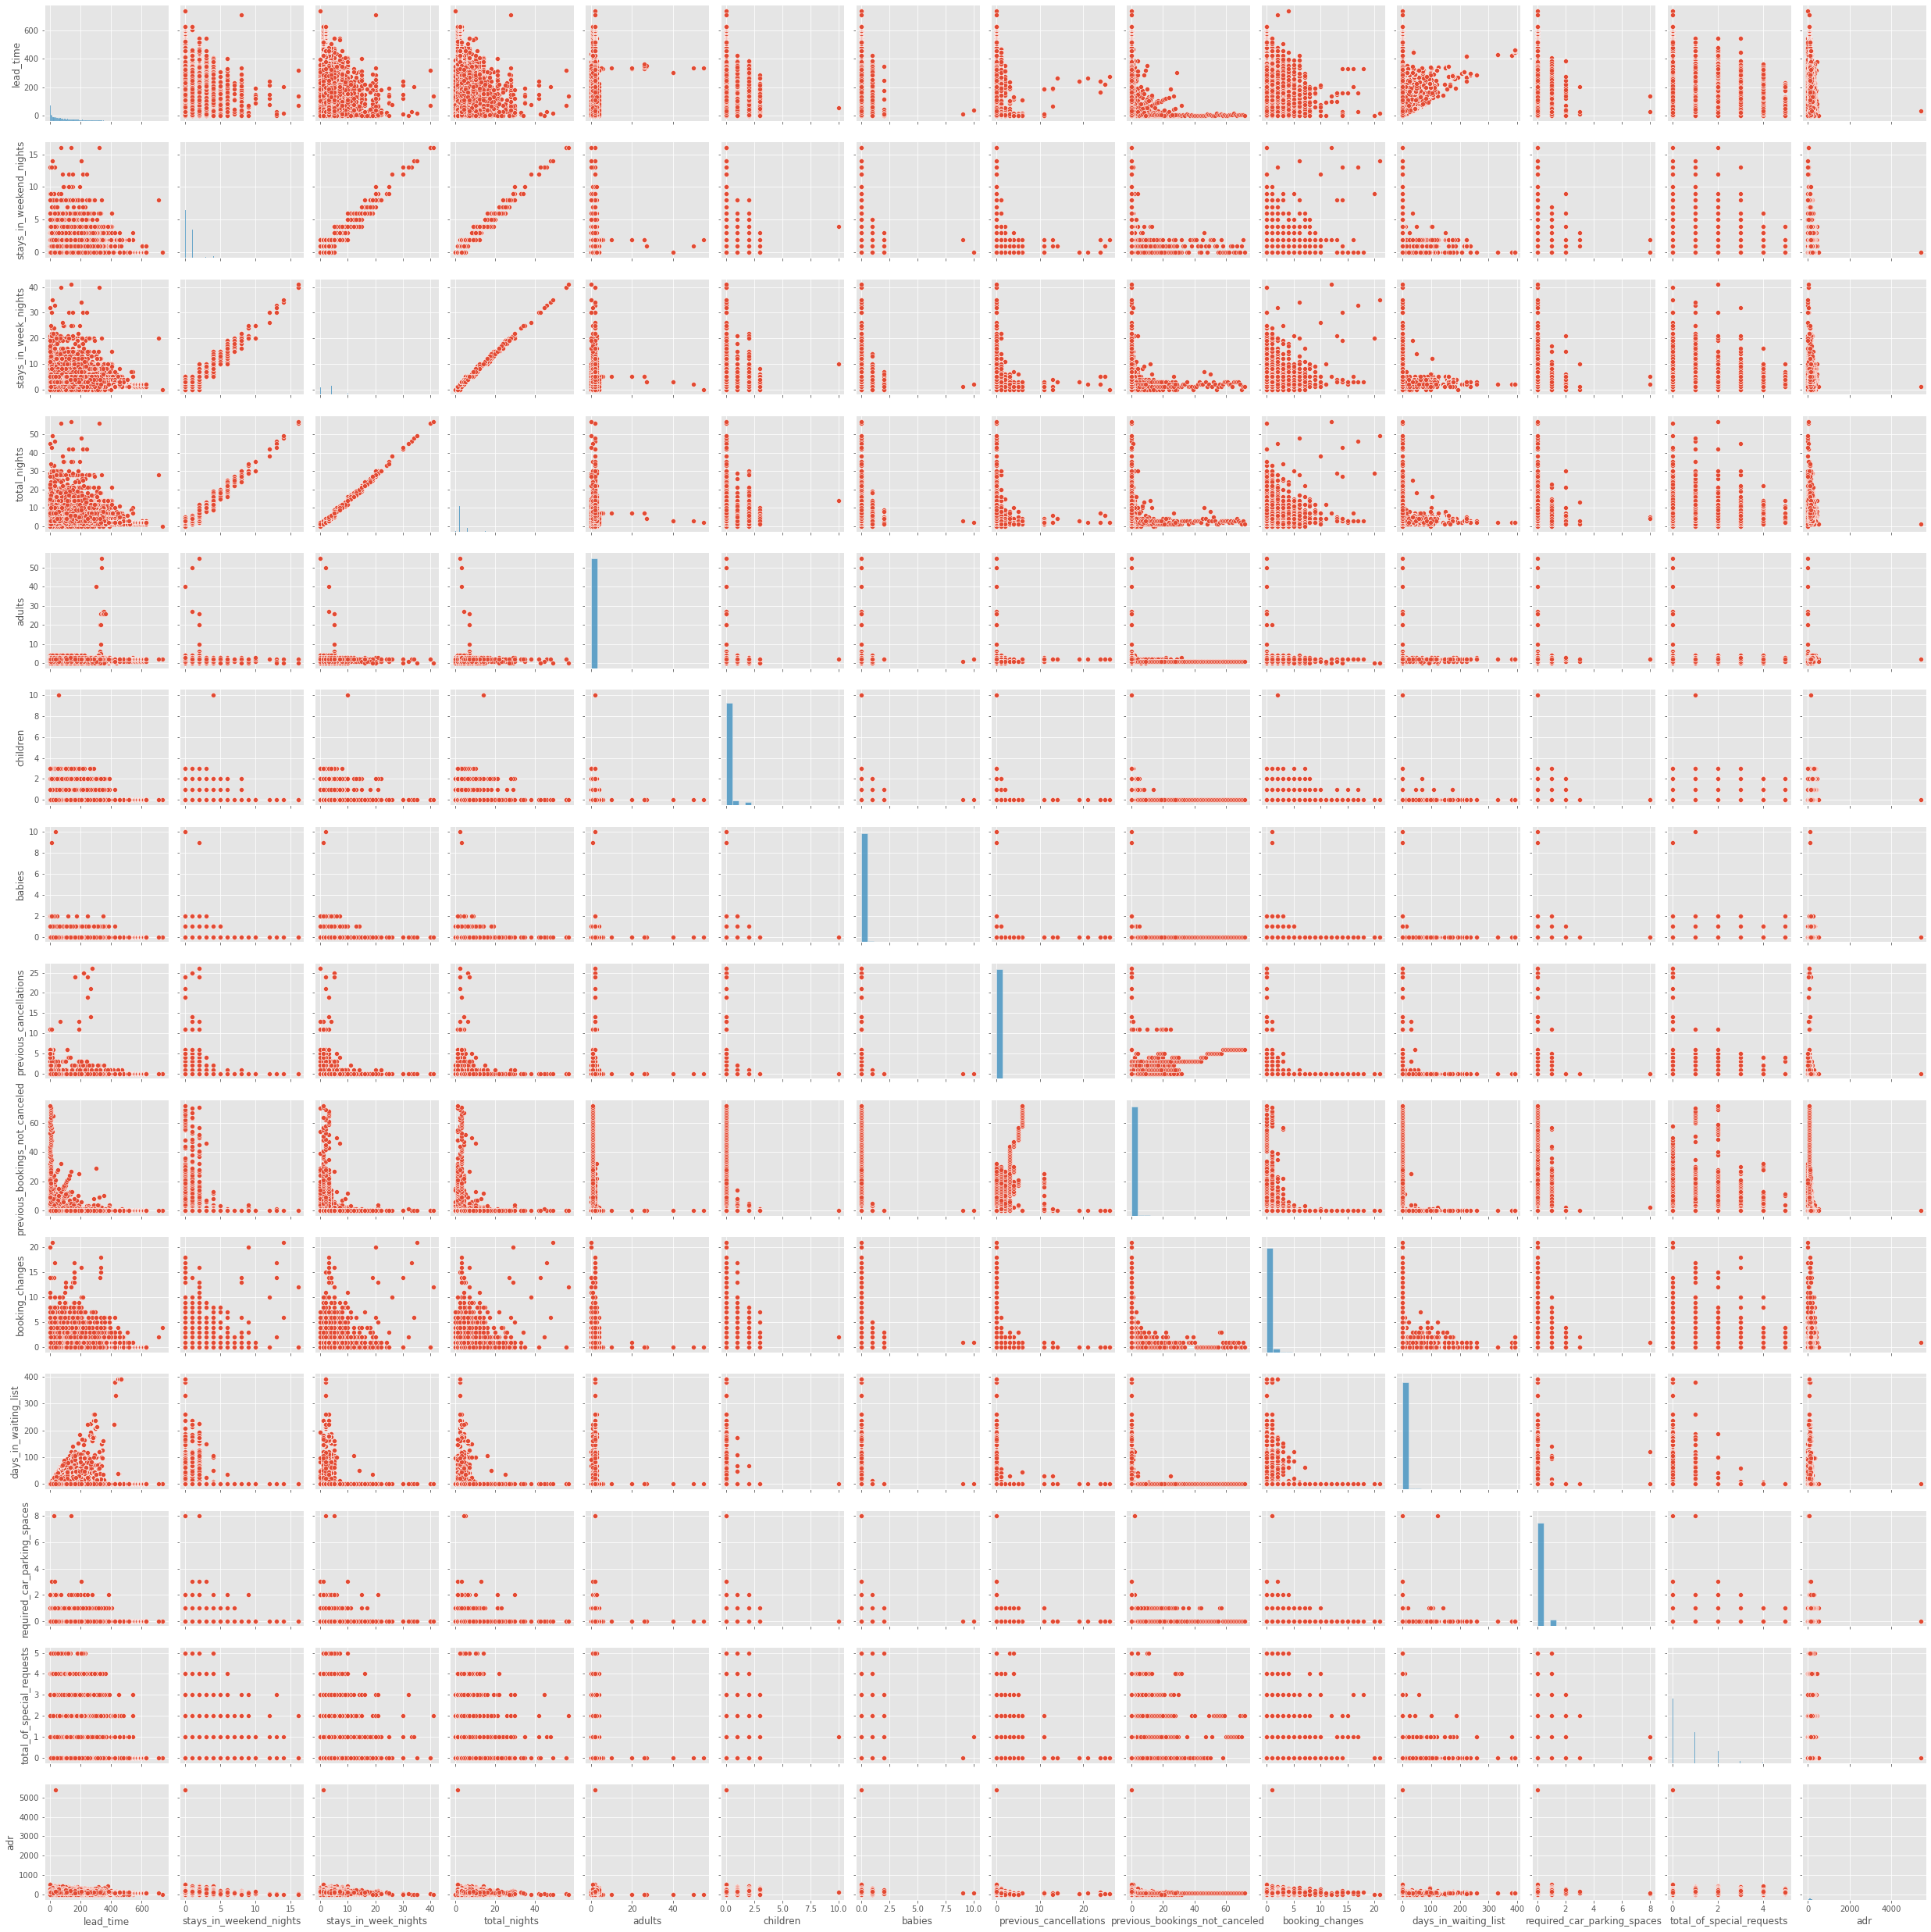

In [798]:
sns.pairplot(df_cleaned[discrete_cont_var])

    off-peak at Dec, Jan, Feb, peak at Apr, May, Jun, Oct, Nov

### 1. What are the number of bookings each year (quarter, month)?

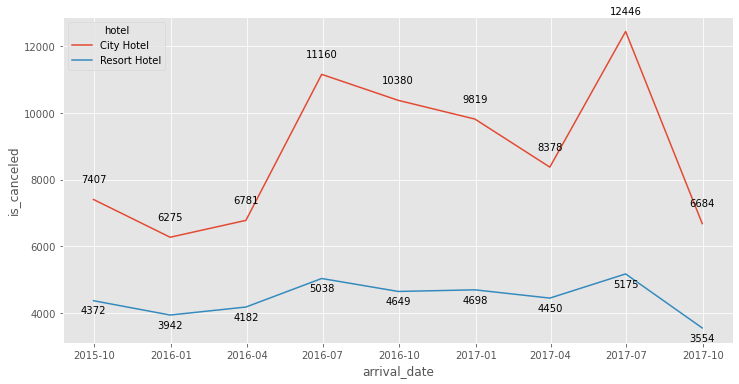

In [799]:
time_series_df = df.groupby(by=['hotel', pd.Grouper(key='arrival_date', freq='Q')])[['is_canceled']].agg('count').reset_index()

plt.figure(figsize=(12, 6))
a = sns.lineplot(x='arrival_date', y='is_canceled', hue='hotel', data=time_series_df)
a.set_title

# adding value labels on line graph
for x_val, y_val in zip(a.lines[0].get_xdata(), a.lines[0].get_ydata()):
    label = f"{y_val:.0f}"
    a.annotate(label, (x_val, y_val), xytext=(0, 15),
               textcoords="offset points", ha='center', va='bottom')
for x_val, y_val in zip(a.lines[1].get_xdata(), a.lines[1].get_ydata()):
    label = f"{y_val:.0f}"
    a.annotate(label, (x_val, y_val), xytext=(0, -15),
               textcoords="offset points", ha='center', va='bottom')

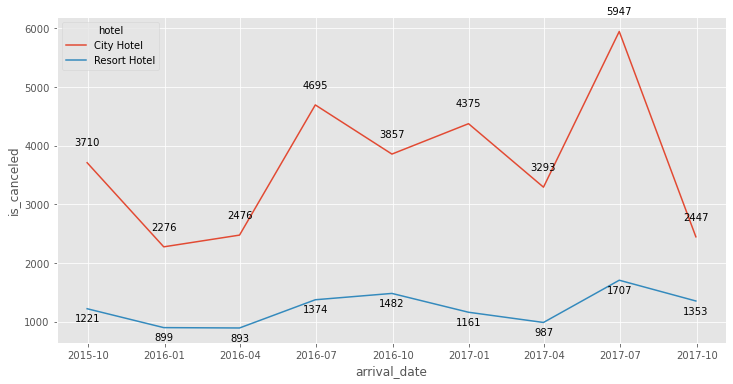

In [800]:
data = df_cleaned.groupby(by=['hotel', pd.Grouper(key='arrival_date', freq='Q')])['is_canceled'].agg('sum').reset_index()

plt.figure(figsize=(12,6))
a = sns.lineplot(data=data, x='arrival_date', y='is_canceled', hue='hotel')
    
for x_val, y_val in zip(a.lines[0].get_xdata(), a.lines[0].get_ydata()):
    label = f"{y_val:.0f}"
    a.annotate(label, (x_val, y_val), xytext=(0, 15),
               textcoords="offset points", ha='center', va='bottom')
for x_val, y_val in zip(a.lines[1].get_xdata(), a.lines[1].get_ydata()):
    label = f"{y_val:.0f}"
    a.annotate(label, (x_val, y_val), xytext=(0, -15),
               textcoords="offset points", ha='center', va='bottom')

### 2. Stratified by the reservation status?

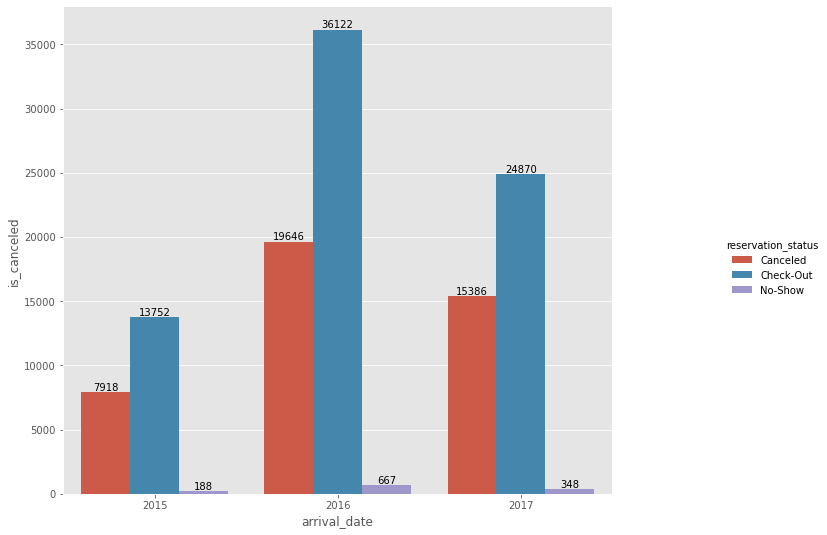

In [801]:
reserve_status_df = df_cleaned.groupby(by=[pd.Grouper(key='arrival_date', freq='Y'), 'reservation_status'])[
    'is_canceled'].agg('count').reset_index()
reserve_status_df['arrival_date'] = reserve_status_df['arrival_date'].dt.year.astype(
    'str')

a = sns.catplot(data=reserve_status_df, kind='bar', x='arrival_date',
                y='is_canceled', hue='reservation_status')
a.fig.set_size_inches(13, 8)

for c in a.axes.flat[0].containers:
    labels = c
    a.axes.flat[0].bar_label(c, label=labels, label_type='edge')

    Insights: 2016 was a bumper year with almost twice of 2015

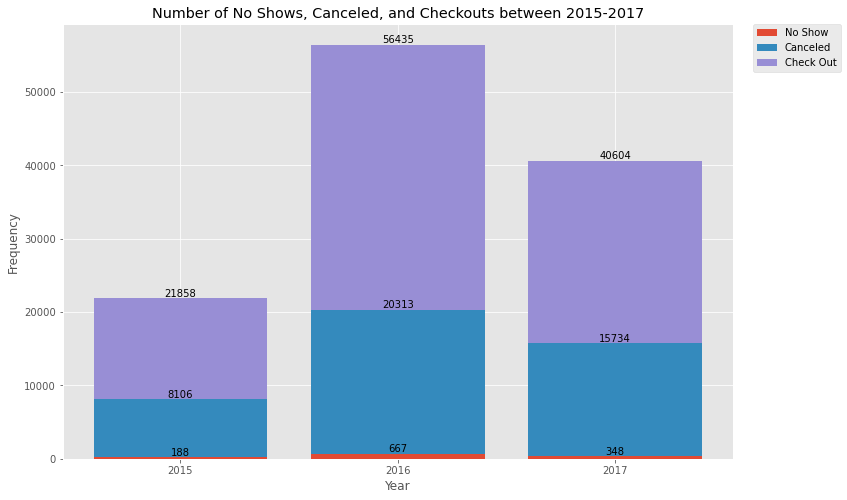

In [802]:
reserve_status_df = df_cleaned.groupby(by=[pd.Grouper(key='arrival_date', freq='Y'), 'reservation_status'])['is_canceled'].agg('count').reset_index()
reserve_status_df['arrival_date'] = reserve_status_df['arrival_date'].dt.year.astype('str')

bottom_layer = reserve_status_df[reserve_status_df['reservation_status'] == 'No-Show']['is_canceled'].to_numpy()
middle_layer = reserve_status_df[reserve_status_df['reservation_status'] == 'Canceled']['is_canceled'].to_numpy()
top_layer = reserve_status_df[reserve_status_df['reservation_status'] == 'Check-Out']['is_canceled'].to_numpy()
groups = reserve_status_df['arrival_date'].unique()

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.bar(groups, bottom_layer, label='No Show')
ax.bar(groups, middle_layer, bottom=bottom_layer, label='Canceled')
ax.bar(groups, top_layer, bottom=np.add(bottom_layer, middle_layer), label='Check Out')
ax.legend(loc=(1.03, 0.89))
ax.set_title('Number of No Shows, Canceled, and Checkouts between 2015-2017')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')

for i in ax.containers:
    ax.bar_label(i)

    Insights: The proportion of Checkouts:Canceled:No-Show did not change much over the years

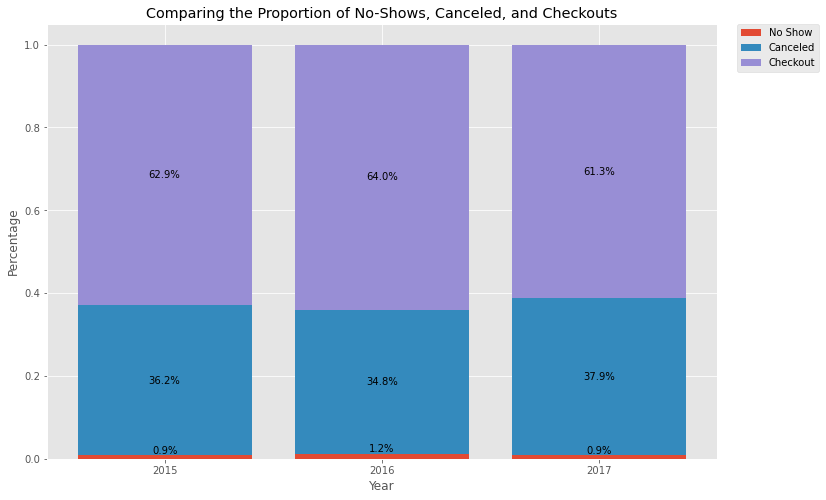

In [803]:
reserve_status_df = df_cleaned.groupby(by=[pd.Grouper(key='arrival_date', freq='Y'), 'reservation_status'])['is_canceled'].agg('count').reset_index()
reserve_status_df['arrival_date'] = reserve_status_df['arrival_date'].dt.year.astype('str')


sum_2015 = reserve_status_df[reserve_status_df['arrival_date'] == '2015']['is_canceled'].sum()
sum_2016 = reserve_status_df[reserve_status_df['arrival_date'] == '2016']['is_canceled'].sum()
sum_2017 = reserve_status_df[reserve_status_df['arrival_date'] == '2017']['is_canceled'].sum()

reserve_status_df.loc[reserve_status_df['arrival_date'] == '2015', 'is_canceled'] = reserve_status_df[reserve_status_df['arrival_date'] == '2015']['is_canceled'] / sum_2015
reserve_status_df.loc[reserve_status_df['arrival_date'] == '2016', 'is_canceled'] = reserve_status_df[reserve_status_df['arrival_date'] == '2016']['is_canceled'] / sum_2016
reserve_status_df.loc[reserve_status_df['arrival_date'] == '2017', 'is_canceled'] = reserve_status_df[reserve_status_df['arrival_date'] == '2017']['is_canceled'] / sum_2017

bottom_layer = reserve_status_df[reserve_status_df['reservation_status'] == 'No-Show']['is_canceled'].to_numpy()
middle_layer = reserve_status_df[reserve_status_df['reservation_status'] == 'Canceled']['is_canceled'].to_numpy()
top_layer = reserve_status_df[reserve_status_df['reservation_status'] == 'Check-Out']['is_canceled'].to_numpy()
groups = reserve_status_df['arrival_date'].unique()

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.bar(groups, bottom_layer, label='No Show')
ax.bar(groups, middle_layer, bottom=bottom_layer, label='Canceled')
ax.bar(groups, top_layer, bottom=np.add(bottom_layer, middle_layer), label='Checkout')
ax.set_title('Comparing the Proportion of No-Shows, Canceled, and Checkouts')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.legend(loc=(1.03, 0.89))


for index in range(len(ax.containers)):
    height_labels = [f'{value.get_height()*100:.1f}%' for value in ax.containers[index]]
    if index == 0:
        ax.bar_label(ax.containers[index], labels=height_labels, label_type='edge')
    else:
        ax.bar_label(ax.containers[index], labels=height_labels, label_type='center')

### 3. Distribution Channel

In [807]:
pd.crosstab(index=df_cleaned['distribution_channel'], columns=df_cleaned['reservation_status'], normalize='index')

reservation_status,Canceled,Check-Out,No-Show
distribution_channel,,,
Corporate,0.210137,0.775998,0.013865
Direct,0.159981,0.824415,0.015605
GDS,0.176166,0.808290,0.015544
TA/TO,0.401463,0.589491,0.009045


    Travel Agencies / Travell offices are where we receive the most number of reservations.
    However, what we should scrutinise is the "quality" of reservations. A reservation is considered bad quality if it is canceled or is a no-show

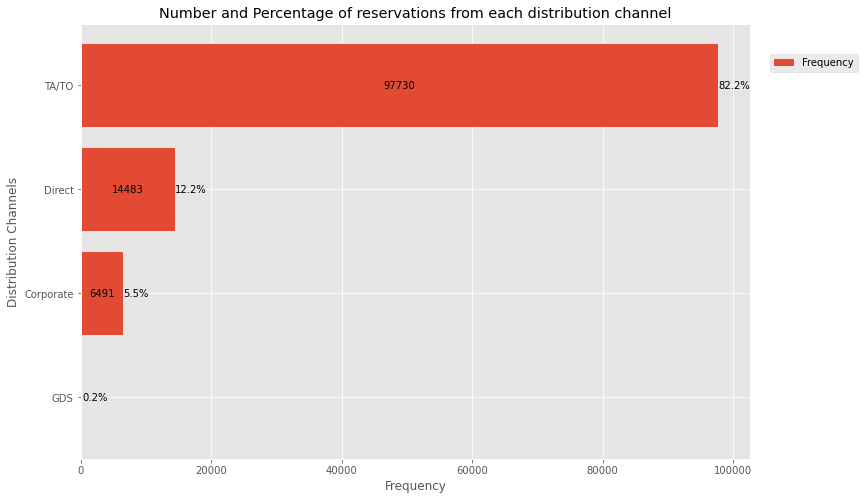

In [808]:
dist_chnl_data = df_cleaned['distribution_channel'].value_counts()
dist_chnl_data_norm = df_cleaned['distribution_channel'].value_counts() / df_cleaned.shape[0]
dist_chnl_data_norm_str = [f'{value*100:.1f}%' for value in dist_chnl_data_norm]

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.barh(y=dist_chnl_data.index, width=dist_chnl_data.values, label='Frequency')
ax.invert_yaxis()
ax.legend(loc=(1.03, 0.89))
ax.set_title('Number and Percentage of reservations from each distribution channel')
ax.set_xlabel('Frequency')
ax.set_ylabel('Distribution Channels')

for container in ax.containers:
    ax.bar_label(container, label_type='center')
    ax.bar_label(container, labels=dist_chnl_data_norm_str, label_type='edge')

del ax.texts[3]

    TA/TOs has the lowest number of quality reservations, while direct has the highest number of quality reservations

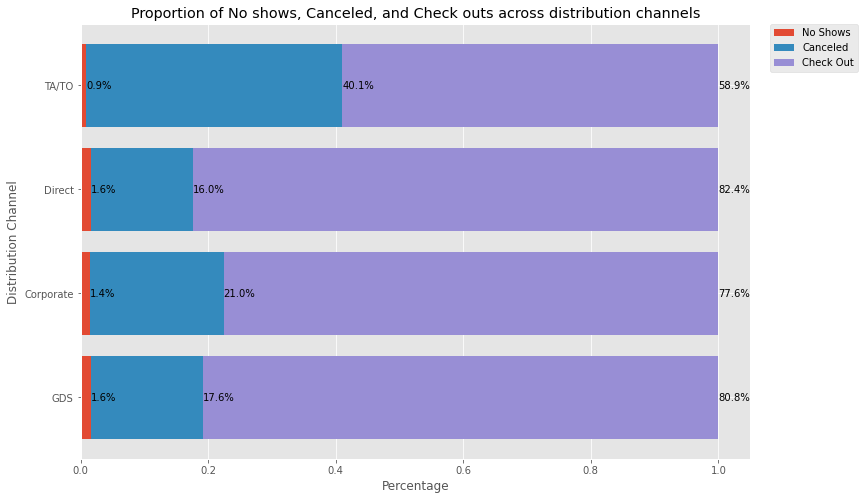

In [809]:
reorder_list = ['GDS', 'Corporate', 'Direct', 'TA/TO']
dist_chnl_ct = pd.crosstab(index=df_cleaned['distribution_channel'], columns=df_cleaned['reservation_status'], normalize='index').reindex(reorder_list)
dist_chnl_ct_noshow = dist_chnl_ct.loc[:, 'No-Show'].to_numpy()
dist_chnl_ct_canceled = dist_chnl_ct.loc[:, 'Canceled'].to_numpy()
dist_chnl_ct_checkout = dist_chnl_ct.loc[:, 'Check-Out'].to_numpy()
dist_chnl_stacked_groups = dist_chnl_ct.index.to_numpy()

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.barh(y=dist_chnl_stacked_groups, width=dist_chnl_ct_noshow, label='No Shows')
ax.barh(y=dist_chnl_stacked_groups, width=dist_chnl_ct_canceled, left=dist_chnl_ct_noshow, label='Canceled')
ax.barh(y=dist_chnl_stacked_groups, width=dist_chnl_ct_checkout, left=np.add(dist_chnl_ct_noshow, dist_chnl_ct_canceled), label='Check Out')

ax.set_xlabel('Percentage')
ax.set_ylabel('Distribution Channel')
ax.set_title('Proportion of No shows, Canceled, and Check outs across distribution channels')
ax.legend(loc=(1.03, 0.89))

for container in ax.containers:
    labels = [f'{value.get_width()*100:.1f}%' for value in container]
    ax.bar_label(container, labels=labels, label_type='edge')


### 4. Average Nights

In [849]:
def num_of_meals(x):
    if x == 'BB':
        return 1
    elif x == 'HB':
        return 2
    elif x == 'FB':
        return 3
    else:
        return 0

df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy['meal'] = df_cleaned_copy['meal'].apply(num_of_meals).astype('int')
meal_data = df_cleaned_copy[df_cleaned_copy['reservation_status'] == 'Check-Out'].groupby(by=pd.Grouper(key='arrival_date', freq='M'))['meal'].agg('mean')
meal_x_labels = [i[:7] for i in meal_data.index.values.astype('str')]
meal_y_values = meal_data.values

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_34898/181983101.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation='vertical')


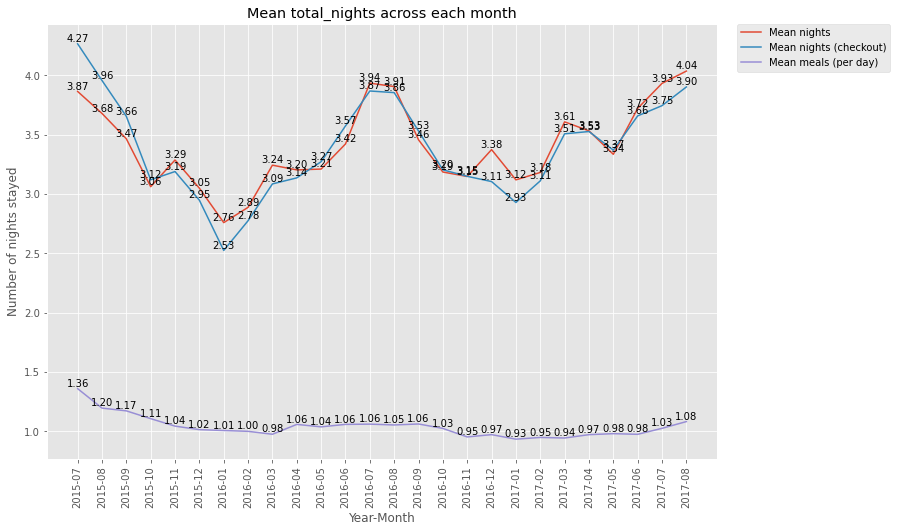

In [850]:
total_nights_mean_data = df_cleaned.groupby(by=pd.Grouper(key='arrival_date', freq='M'))[['total_nights']].agg('mean')
total_nights_checkout_mean = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].groupby(by=pd.Grouper(key='arrival_date', freq='M'))[['total_nights']].agg('mean')

x_labels = total_nights_mean_data.index.astype('str')
x_labels = [i[:7] for i in x_labels]
y_labels = total_nights_mean_data['total_nights'].values
y_label_checkout = total_nights_checkout_mean['total_nights'].values

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.plot(x_labels, y_labels, label='Mean nights')
ax.plot(x_labels, y_label_checkout, label='Mean nights (checkout)')
ax.plot(x_labels, meal_y_values, label='Mean meals (per day)')
ax.set_xticklabels(x_labels, rotation='vertical')
ax.set_title('Mean total_nights across each month')
ax.set_ylabel('Number of nights stayed')
ax.set_xlabel('Year-Month')
ax.legend(loc=(1.03, 0.89))

for i in range(len(ax.lines)):
    for x_val, y_val in zip(ax.lines[i].get_xdata(), ax.lines[i].get_ydata()):
        label = f"{y_val:.2f}"
        ax.annotate(label, (x_val, y_val), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom')

plt.show()

    Insight: Mean number of nights seem to peak in the July-to-August region. Lowest would probably be the start of each year. Little variation between those reservations that got canceled versus those that actualised their stay in the hotel

### 5. Which is the more popular hotel?

    This can be interpreted 2 ways: The first is the number of bookings, and second, the actual number of stays. I will be plotting both

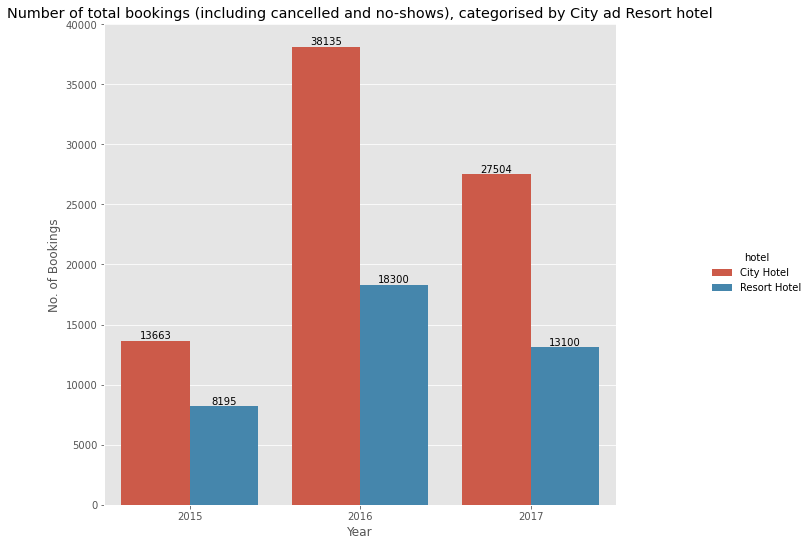

In [893]:
popular_hotel_og = df_cleaned.groupby(by=['hotel', pd.Grouper(key='arrival_date', freq='Y')])['is_canceled'].agg('count').reset_index()
popular_hotel_og['arrival_date'] = popular_hotel_og['arrival_date'].astype('str').str.slice(0, 7)

a = sns.catplot(kind='bar', data=popular_hotel_og, x='arrival_date', y='is_canceled', hue='hotel', ci=None)
a.fig.set_size_inches(12, 8)

a.ax.set_title('Number of total bookings (including cancelled and no-shows), categorised by City ad Resort hotel')
a.ax.set_xlabel('Year')
a.ax.set_ylabel('No. of Bookings')
a.ax.set_xticklabels(['2015', '2016', '2017'])

for index, container in enumerate(a.ax.containers):
    labels = [f'{value.get_height():.0f}' for value in container]
    a.ax.bar_label(container, label=labels, label_type='edge')


In [897]:
print(8096/13663, 18300/38136, 13100/27504)

0.5925492205225792 0.47986154814348647 0.47629435718440954


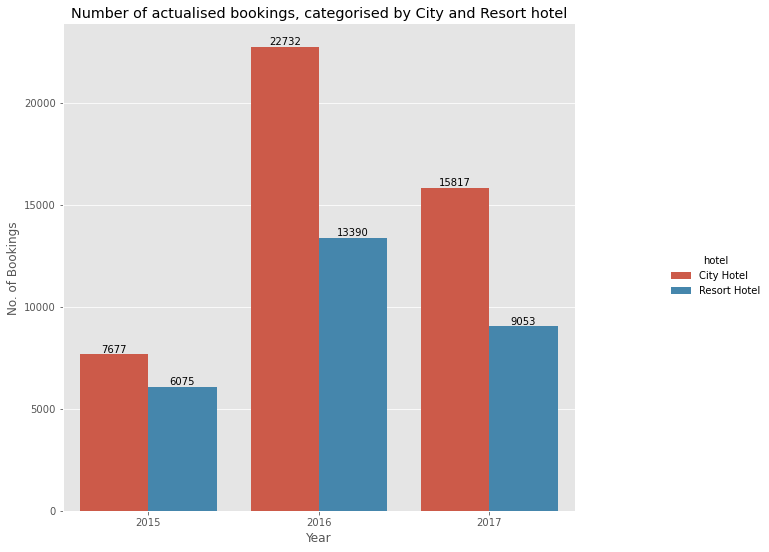

In [898]:
df_cleaned_checkout = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].copy()
popular_hotel_df = df_cleaned_checkout.groupby(by=['hotel', pd.Grouper(key='arrival_date', freq='Y')])['is_canceled'].agg('count').reset_index()
popular_hotel_df['arrival_date'] = popular_hotel_df['arrival_date'].astype('str').str.slice(0, 7)

a = sns.catplot(kind='bar', data=popular_hotel_df, x='arrival_date', y='is_canceled', hue='hotel', ci=None)
a.fig.set_size_inches(12, 8)

a.ax.set_title('Number of actualised bookings, categorised by City and Resort hotel')
a.ax.set_xlabel('Year')
a.ax.set_ylabel('No. of Bookings')
a.ax.set_xticklabels(['2015', '2016', '2017'])

for index, container in enumerate(a.ax.containers):
    labels = [f'{value.get_height():.0f}' for value in container]
    a.ax.bar_label(container, label=labels, label_type='edge')

In [896]:
print(6075 / 7677, 13390/22737, 9053/15817)

0.7913247362250879 0.5889079473985135 0.5723588543971676


### Comparing the proportion of guests (adults, children, babies)

    Goal: I want to compare the number of adults, children, and babies across years and across different hotels
    + 100% stack bar plot

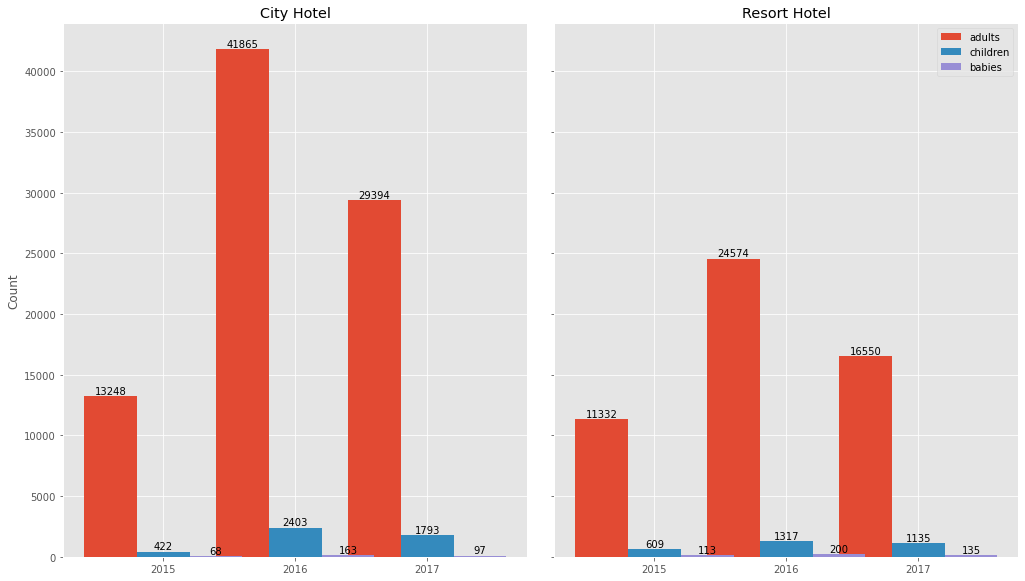

In [1083]:
df_cleaned_checkout = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].copy()
df_adults_kids = df_cleaned_checkout.groupby(by=['hotel', pd.Grouper(key='arrival_date', freq='Y')])[['adults', 'children', 'babies']].agg('sum').reset_index()

width=0.4
x_labels = np.arange(3)
fig1_y_adults = df_adults_kids.loc[[0, 1, 2], 'adults']
fig1_y_children = df_adults_kids.loc[[0, 1, 2], 'children']
fig1_y_babies = df_adults_kids.loc[[0, 1, 2], 'babies']

fig2_y_adults = df_adults_kids.loc[[3,4,5], 'adults']
fig2_y_children = df_adults_kids.loc[[3,4,5], 'children']
fig2_y_babies = df_adults_kids.loc[[3,4,5], 'babies']

fig, ax = plt.subplots(1, 2, sharey='row')
fig.set_size_inches(14, 8)
fig.tight_layout()
# fig.suptitle("Comparing guest categories between Resort and City Hotels")

ax[0].bar(x_labels - width, height=fig1_y_adults, width=width, label='adults')
ax[0].bar(x_labels, height=fig1_y_children, width=width, label='children')
ax[0].bar(x_labels + width, height=fig1_y_babies, width=width, label='babies')
ax[0].set_xticks(ticks=x_labels, minor=False)
ax[0].set_xticklabels(['2015', '2016', '2017'])
ax[0].set_title("City Hotel")
ax[0].set_ylabel('Count')

for container in ax[0].containers:
    ax[0].bar_label(container)

ax[1].bar(x_labels - width, height=fig2_y_adults, width=width, label='adults')
ax[1].bar(x_labels, height=fig2_y_children, width=width, label='children')
ax[1].bar(x_labels + width, height=fig2_y_babies, width=width, label='babies')
ax[1].set_xticks(ticks=x_labels, minor=False)
ax[1].set_xticklabels(['2015', '2016', '2017'])
ax[1].set_title("Resort Hotel")
ax[1].legend()

for container in ax[1].containers:
    ax[1].bar_label(container)

plt.show()


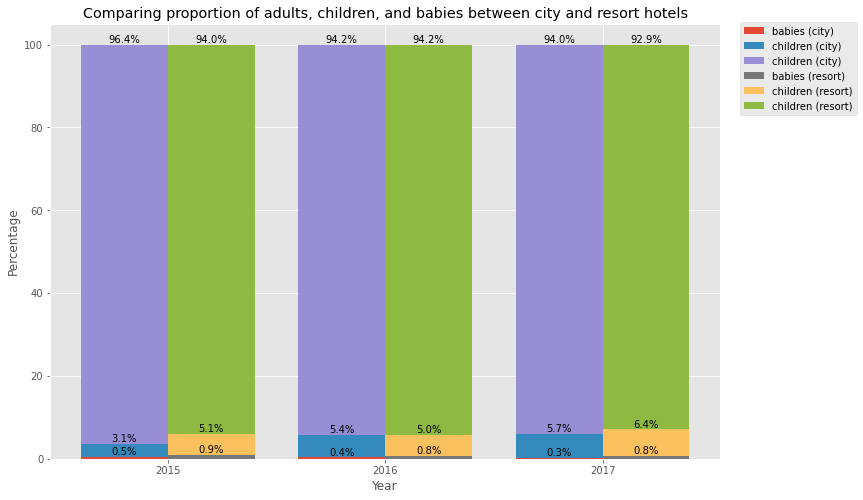

In [1084]:
df_cleaned_checkout = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].copy()
df_adults_kids = df_cleaned_checkout.groupby(by=['hotel', pd.Grouper(key='arrival_date', freq='Y')])[['adults', 'children', 'babies']].agg('sum').reset_index()
df_adults_kids.loc[:, ['adults', 'children', 'babies']] = df_adults_kids[['adults', 'children', 'babies']] * 100 / df_adults_kids[['adults', 'children', 'babies']].sum(axis=1).to_numpy().reshape(6, 1)

width=0.4
x_labels = np.arange(3)
fig1_y_adults = df_adults_kids.loc[[0, 1, 2], 'adults'].to_numpy()
fig1_y_children = df_adults_kids.loc[[0, 1, 2], 'children'].to_numpy()
fig1_y_babies = df_adults_kids.loc[[0, 1, 2], 'babies'].to_numpy()

fig2_y_adults = df_adults_kids.loc[[3,4,5], 'adults'].to_numpy()
fig2_y_children = df_adults_kids.loc[[3,4,5], 'children'].to_numpy()
fig2_y_babies = df_adults_kids.loc[[3,4,5], 'babies'].to_numpy()

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.bar(x=x_labels-0.2, height=fig1_y_babies, width=width, label='babies (city)')
ax.bar(x=x_labels-0.2, height=fig1_y_children, width=width, bottom=fig1_y_babies, label='children (city)')
ax.bar(x=x_labels-0.2, height=fig1_y_adults, width=width, bottom=np.add(fig1_y_babies, fig1_y_children), label='children (city)')
ax.bar(x=x_labels+0.2, height=fig2_y_babies, width=width, label='babies (resort)')
ax.bar(x=x_labels+0.2, height=fig2_y_children, width=width, bottom=fig2_y_babies, label='children (resort)')
ax.bar(x=x_labels+0.2, height=fig2_y_adults, width=width, bottom=np.add(fig2_y_babies, fig2_y_children), label='children (resort)')
ax.legend(loc=(1.03, 0.79))
ax.set_title("Comparing proportion of adults, children, and babies between city and resort hotels")
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_xticks([0, 1, 2], minor=False)
ax.set_xticklabels(['2015', '2016', '2017'])

for index in range(len(ax.containers)):
    labels = [f'{value.get_height():.1f}%' for value in ax.containers[index]]
    ax.bar_label(ax.containers[index], labels=labels, label_type='edge')


### Comparing between room types and hotel types

In [1064]:
def add_rows(df):
    df_result = df.copy()
    room_alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']
    hotel_types = ['City Hotel', 'Resort Hotel']

    for room in room_alphabets:
        for hotel_type in hotel_types:
            if df_result.query('assigned_room_type == @room & hotel == @hotel_type').shape[0] == 0:
                df_result = df_result.append(pd.Series([room, hotel_type, 0], index=['assigned_room_type', 'hotel', 'is_canceled']), ignore_index=True)

    df_result = df_result.sort_values('assigned_room_type')
    return df_result

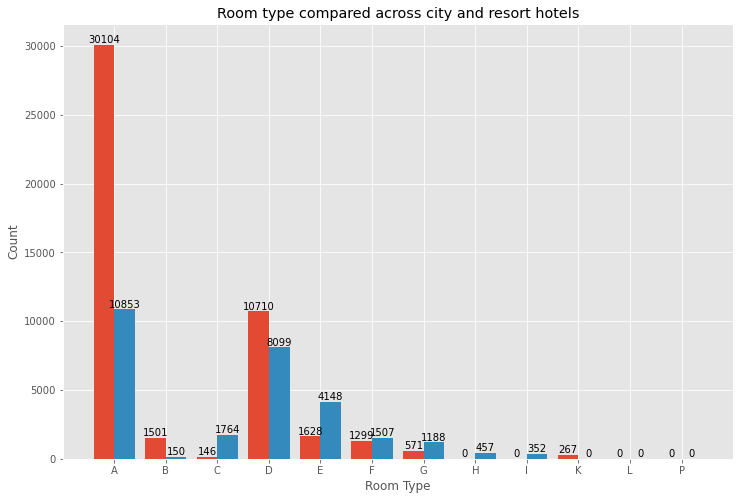

In [1086]:
df_cleaned_checkout = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].copy()
room_type_data = df_cleaned_checkout.groupby(by=['assigned_room_type', 'hotel'])['is_canceled'].agg('count').reset_index()
room_type_data = add_rows(room_type_data)

width=0.4
x_labels = room_type_data['assigned_room_type'].unique()
x = np.arange(len(x_labels))
y_values_city = room_type_data.query('hotel == "City Hotel"')['is_canceled'].values
y_values_resort = room_type_data.query('hotel == "Resort Hotel"')['is_canceled'].values

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax.bar(x=x-0.2, height=y_values_city, width=width, label='City Hotel')
ax.bar(x=x+0.2, height=y_values_resort, width=width, label='Resort Hotel')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Room Type')
ax.set_ylabel('Count')
ax.set_title("Room type compared across city and resort hotels")

for container in ax.containers:
    ax.bar_label(container)

### Hotel Rates and Room Types

In [1090]:
hotel_rates_room_type

,assigned_room_type,hotel,adr
0,A,City Hotel,97.298555
1,A,Resort Hotel,80.388061
2,B,City Hotel,93.684977
3,B,Resort Hotel,102.288333
4,C,City Hotel,99.829863
5,C,Resort Hotel,107.405986
6,D,City Hotel,115.887696
7,D,Resort Hotel,81.911453
8,E,City Hotel,138.555805
9,E,Resort Hotel,101.249209


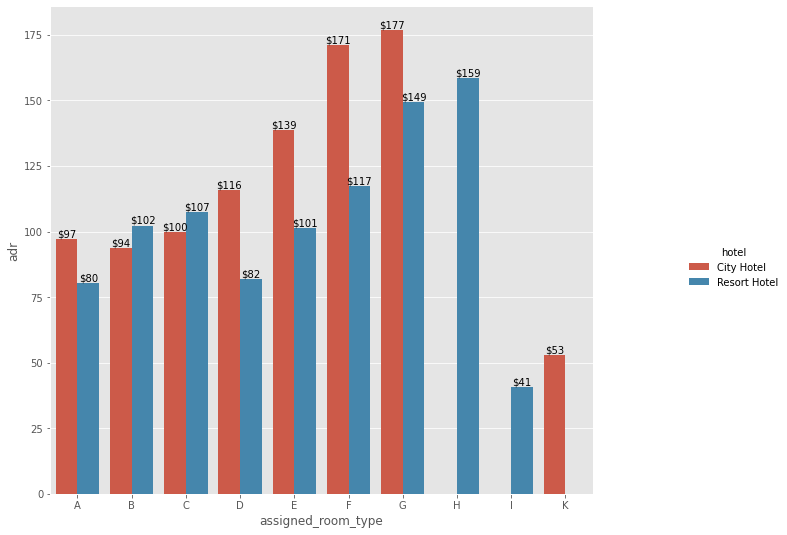

In [1106]:
df_cleaned_checkout = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].copy()
hotel_rates_room_type = df_cleaned_checkout.groupby(by=['assigned_room_type', 'hotel'])['adr'].agg('mean').reset_index()

a1 = sns.catplot(kind='bar', data=hotel_rates_room_type, x='assigned_room_type', y='adr', hue='hotel')
a1.fig.set_size_inches(12, 8)

for container in a1.ax.containers:
    labels = [f'${value.get_height():.0f}'for value in container]
    a1.ax.bar_label(container, labels=labels, label_type='edge')

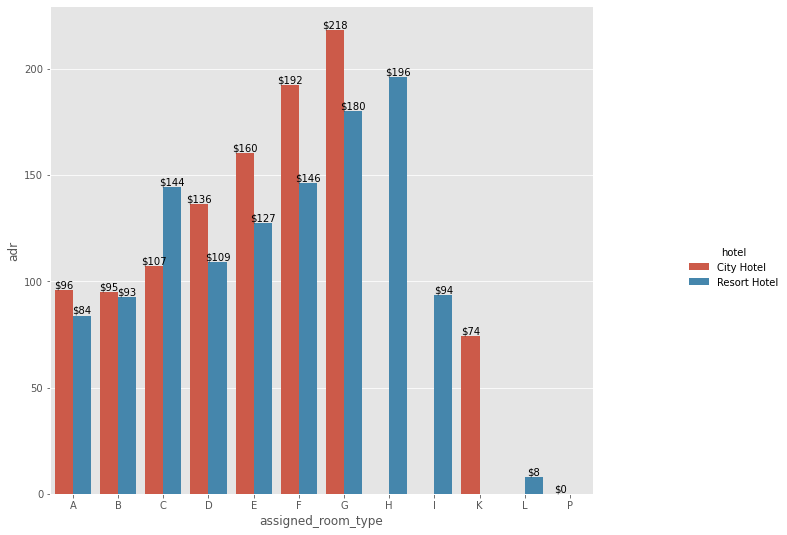

In [1107]:
df_cleaned_checkout = df_cleaned[df_cleaned['reservation_status'] != 'Check-Out'].copy()
hotel_rates_room_type = df_cleaned_checkout.groupby(by=['assigned_room_type', 'hotel'])['adr'].agg('mean').reset_index()

a2 = sns.catplot(kind='bar', data=hotel_rates_room_type, x='assigned_room_type', y='adr', hue='hotel')
a2.fig.set_size_inches(12, 8)

for container in a2.ax.containers:
    labels = [f'${value.get_height():.0f}'for value in container]
    a2.ax.bar_label(container, labels=labels, label_type='edge')

    A cursory examination of both graph show that those that cancelled generally had higher fees. Perhaps one reason for cancellation is that gusts do not feel that have a good rate on the daily price

### Room

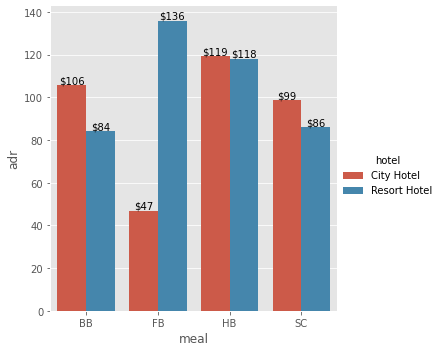

In [1117]:
df_cleaned_checkout = df_cleaned[df_cleaned['reservation_status'] == 'Check-Out'].copy()
meal_adr = df_cleaned_checkout.groupby(by=['meal', 'hotel'])['adr'].agg('mean').reset_index()

a = sns.catplot(kind='bar', data=meal_adr, x='meal', y='adr', hue='hotel')

for container in a.ax.containers:
    labels = [f'${value.get_height():.0f}'for value in container]
    a.ax.bar_label(container, labels=labels, label_type='edge')

    This is interesting. For city hotel, the cost of staying for one night with full breakfast is the cheapest. 

### Statistical Analysis

In [810]:
pd.crosstab(df['hotel'], df['children'], margins=True, normalize='index')

children,0,1,2,3,10
hotel,,,,,
City Hotel,0.935636,0.038107,0.025514,0.000744,0.000000
Resort Hotel,0.913030,0.045881,0.040639,0.000424,0.000025
All,0.928051,0.040715,0.030589,0.000637,0.000008


In [811]:
tot_row = np.sum(np.array(pd.crosstab(df['hotel'], df['children']).values), axis=0)
tot_col = np.sum(np.array(pd.crosstab(df['hotel'], df['children']).values), axis=1).reshape(2,1)
expected_freq = tot_col * tot_row / sum(tot_row)
observed_freq = np.array(pd.crosstab(df['hotel'], df['children']).values)

# ((expected_freq - observed_freq)**2 / expected_freq).sum()
stats.chisquare(f_obs=observed_freq, f_exp=expected_freq, axis=None, ddof=4)

Power_divergenceResult(statistic=259.49856427873624, pvalue=5.030776324358715e-54)

In [812]:
column_sum = pd.crosstab(index=df['is_canceled'], columns=df['reserved_room_type']).values.sum(axis=1).reshape(2,1)
row_sum = pd.crosstab(index=df['is_canceled'], columns=df['reserved_room_type']).values.sum(axis=0)

obs_freq = pd.crosstab(index=df['is_canceled'], columns=df['reserved_room_type']).values
exp_freq = (column_sum * row_sum) / sum(row_sum)

stats.chisquare(f_obs=obs_freq, f_exp=exp_freq, ddof = 9, axis=None)

Power_divergenceResult(statistic=647.8350973363271, pvalue=9.80171872710665e-133)